In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [6]:
null_count = df.isnull().sum()
null_per = df.isnull().mean() * 100

pd.DataFrame({'Null Count' : null_count,
              'Null %' : null_per})

,Null Count,Null %
track_id,0,0.000000
track_name,5,0.015229
track_artist,5,0.015229
track_popularity,0,0.000000
track_album_id,0,0.000000
track_album_name,5,0.015229
track_album_release_date,0,0.000000
playlist_name,0,0.000000
playlist_id,0,0.000000
playlist_genre,0,0.000000


### Preprocessing

In [8]:
#Feature selection
features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [9]:
# Normalize features
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

### Split data and compute similarity

In [10]:
# Split dataset
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
# Compute cosine similarity between tracks based on selected features
track_features = df[features]
track_similarity_matrix = cosine_similarity(track_features, track_features)

track_similarity_df = pd.DataFrame(track_similarity_matrix, index=df['track_id'], columns=df['track_id'])

### Find similar tracks based on track id

In [13]:
def find_top_similar_songs(song_id, top_n=5):
    chosen_song_index = df[df['track_id'] == song_id].index[0]
    similarity_scores = track_similarity_df.iloc[chosen_song_index]
    similar_songs = similarity_scores.sort_values(ascending=False)
    top_similar_songs = similar_songs.iloc[1:top_n+1]
    top_similar_song_ids = top_similar_songs.index.tolist()
    top_similar_songs_details = df[df['track_id'].isin(top_similar_song_ids)]

    return top_similar_songs_details

In [20]:
chosen_track_id = '1BxkZE73h9BN3qwuA15TA3'
top_similar_songs = find_top_similar_songs(chosen_track_id, top_n=5)
print(top_similar_songs)

                     track_id                        track_name track_artist  \
1849   78QR3Wp35dqAhFEc2qAGjE  Drip Too Hard (Lil Baby & Gunna)     Lil Baby   
6216   78QR3Wp35dqAhFEc2qAGjE  Drip Too Hard (Lil Baby & Gunna)     Lil Baby   
8358   78QR3Wp35dqAhFEc2qAGjE  Drip Too Hard (Lil Baby & Gunna)     Lil Baby   
18746  78QR3Wp35dqAhFEc2qAGjE  Drip Too Hard (Lil Baby & Gunna)     Lil Baby   
23244  78QR3Wp35dqAhFEc2qAGjE  Drip Too Hard (Lil Baby & Gunna)     Lil Baby   

       track_popularity          track_album_id track_album_name  \
1849                 84  2yXnY2NiaZk9QiJJittS81      Drip Harder   
6216                 84  2yXnY2NiaZk9QiJJittS81      Drip Harder   
8358                 84  2yXnY2NiaZk9QiJJittS81      Drip Harder   
18746                84  2yXnY2NiaZk9QiJJittS81      Drip Harder   
23244                84  2yXnY2NiaZk9QiJJittS81      Drip Harder   

      track_album_release_date  \
1849                2018-10-05   
6216                2018-10-05   
8358    

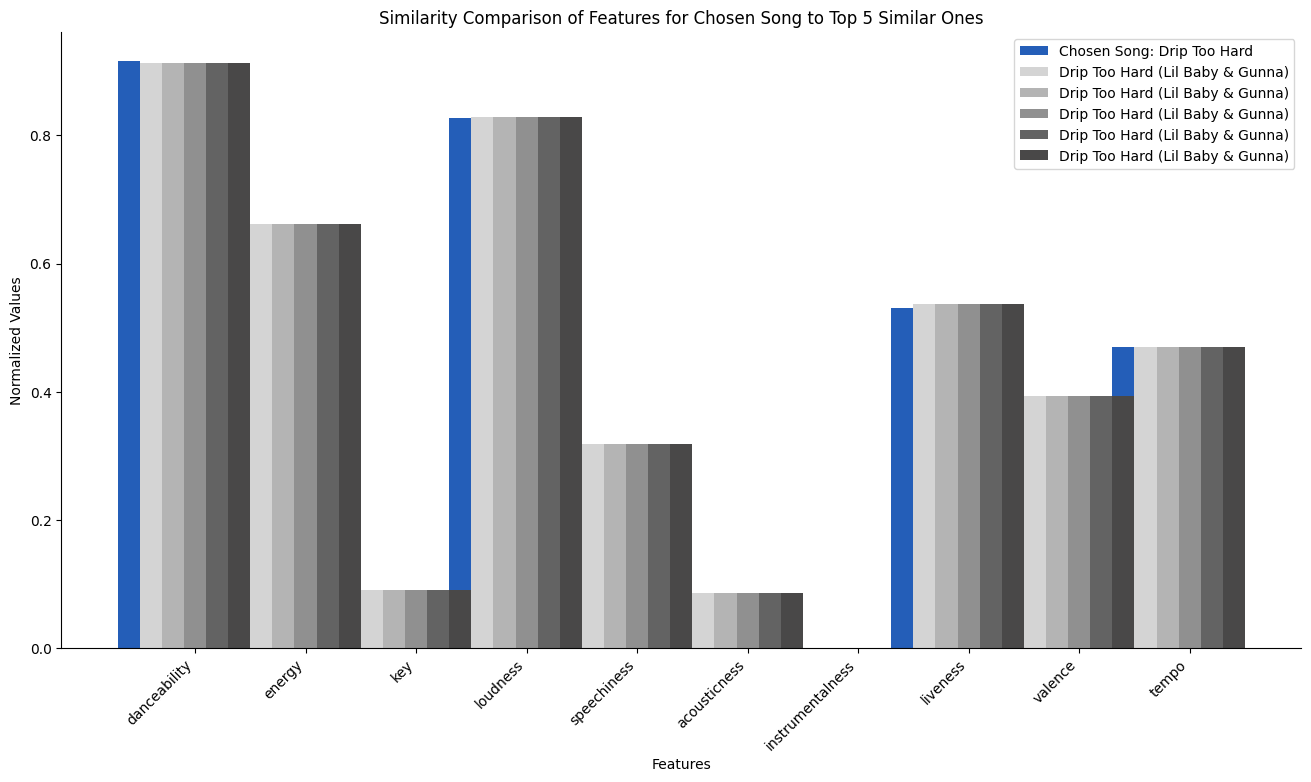

In [21]:
def plot_similarity_comparison(chosen_track_id, top_similar_songs):

    chosen_song = df[df['track_id'] == chosen_track_id]
    chosen_song_features = chosen_song[features].values.flatten()
    top_similar_songs_features = top_similar_songs[features].values

    plt.figure(figsize=(16, 8))
    bar_width = 0.2
    index = range(len(features))
    plt.bar(index, chosen_song_features, bar_width, label=f'Chosen Song: {chosen_song.iloc[0]["track_name"]}', color='#245eb8')
    
    colors = ['#D4D4D4', '#B4B4B4', '#909090', '#636363', '#494848']

    for i, similar_song_features in enumerate(top_similar_songs_features):
        plt.bar([x + (i + 1) * bar_width for x in index], similar_song_features, bar_width, label=top_similar_songs.iloc[i]['track_name'], color=colors[i])
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Features')
    plt.ylabel('Normalized Values')
    plt.title(f'Similarity Comparison of Features for Chosen Song to Top 5 Similar Ones')
    plt.xticks([x + (len(top_similar_songs) + 1) * bar_width / 2 for x in index], features, rotation=45, ha='right') 
    plt.legend(fontsize=10)
    plt.show()

plot_similarity_comparison(chosen_track_id, top_similar_songs)